## Tree using Linked List

### Create Tree

In [769]:
class TreeNode:
    def __init__(self, data, children = []):
        self.data = data
        self.children = children

    def __str__(self, level = 0):
        ret_val = "  " * level + str(self.data) + "\n"
        for child in self.children:
            ret_val += child.__str__(level + 1)
        return ret_val

    def AddChild(self, TreeNode):
        self.children.append(TreeNode)

In [770]:
OurTree = TreeNode("Drinks", [])
cold = TreeNode("Cold", [])
hot = TreeNode("Hot", [])
OurTree.AddChild(cold)
OurTree.AddChild(hot)
fanta = TreeNode("Fanta", [])
cola = TreeNode("Cola", [])
tea = TreeNode("Tea", [])
coffe = TreeNode("Coffe", [])
hot.AddChild(tea)
hot.AddChild(coffe)
cold.AddChild(fanta)
cold.AddChild(cola)
print(OurTree)

Drinks
  Cold
    Fanta
    Cola
  Hot
    Tea
    Coffe



### Create Binary Tree Using Linked List

In [771]:
class TreeNode:
    # Time: O(1)
    # Space: O(1)
    def __init__(self, data):
        self.data = data
        self.leftChild = None
        self.rightChild = None

    
newBT = TreeNode("Drinks")
leftchild = TreeNode("Hot")
rightchild = TreeNode("Cold")
newBT.leftChild = leftchild
newBT.rightChild = rightchild
leftchild_left = TreeNode("Caffe")
rightchild_left = TreeNode("Cacao")
leftchild_right = TreeNode("Beer")
rightchild_right = TreeNode("Fanta")
leftchild.leftChild = leftchild_left
leftchild.rightChild = rightchild_left
rightchild.leftChild = leftchild_right
rightchild.rightChild = rightchild_right


### Traversal of Binary Tree

##### PreOrder Traversal of Binary Tree

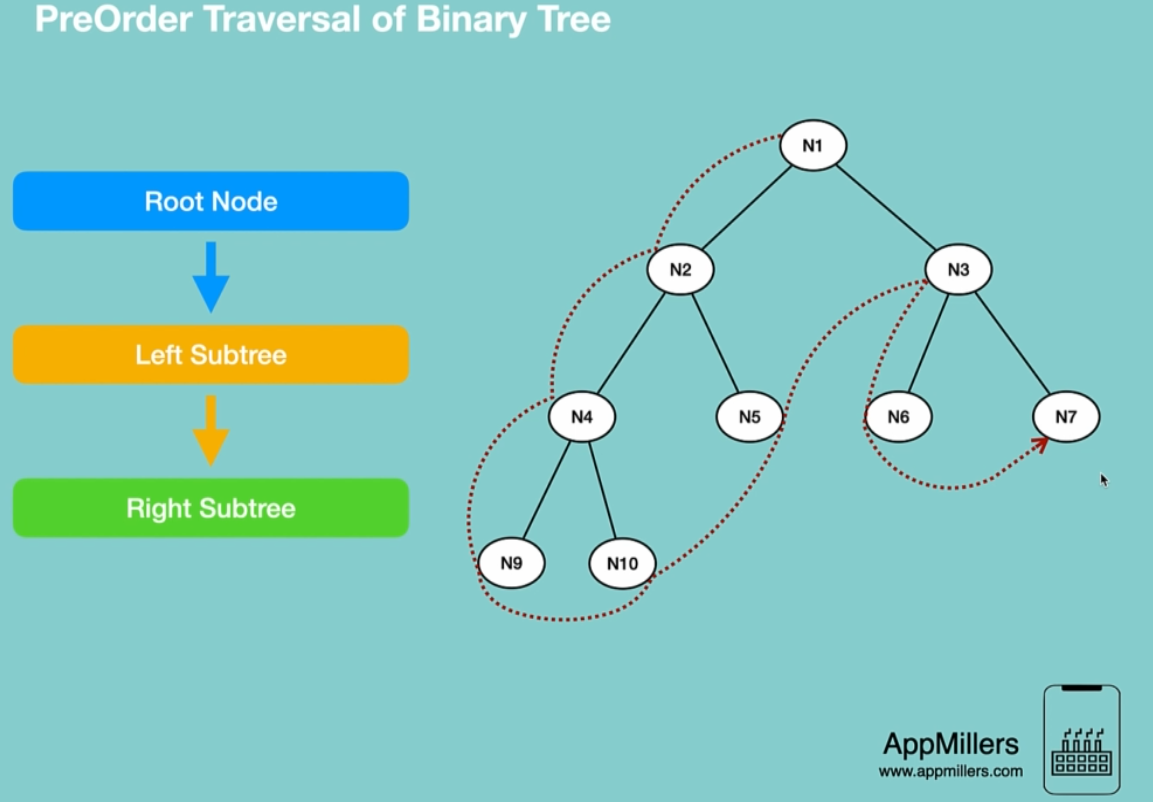

In [772]:
from IPython.display import Image
Image(filename="preorder.PNG")

In [773]:
# Time: O(n)
# Space: O(n)   Because we use stack memory
def PreOrderTraversal(rootNode):
    if rootNode == None:
        return
    print(rootNode.data)
    PreOrderTraversal(rootNode.leftChild)
    PreOrderTraversal(rootNode.rightChild)

In [774]:
PreOrderTraversal(newBT)

Drinks
Hot
Caffe
Cacao
Cold
Beer
Fanta


##### InOrder Traversal of Binary Tree

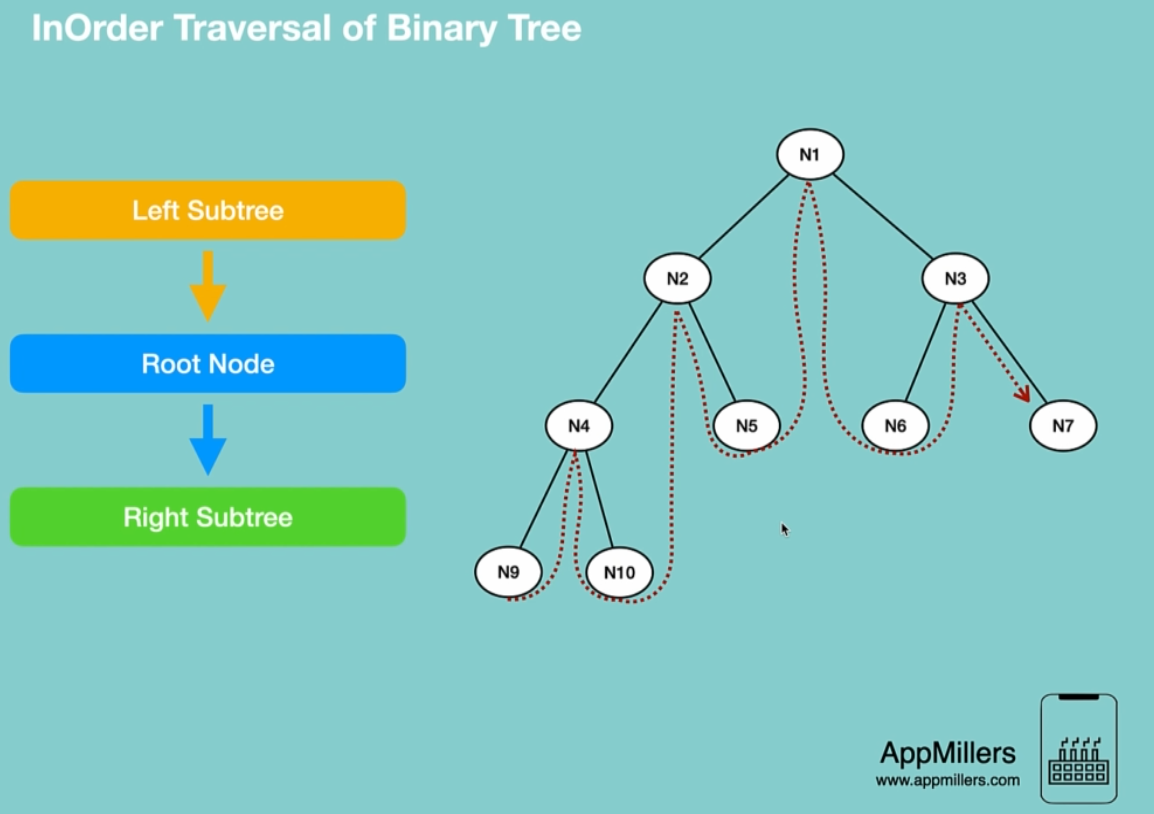

In [775]:
from IPython.display import Image
Image(filename="inorder.PNG")

In [776]:
# Time: O(n)
# Space: O(n)   Because we use stack memory
def InOrderTraversal(rootNode):
    if rootNode == None:
        return
    InOrderTraversal(rootNode.leftChild)
    print(rootNode.data)
    InOrderTraversal(rootNode.rightChild)

In [777]:
InOrderTraversal(newBT)

Caffe
Hot
Cacao
Drinks
Beer
Cold
Fanta


##### PostOrder Traversal of Binary Tree

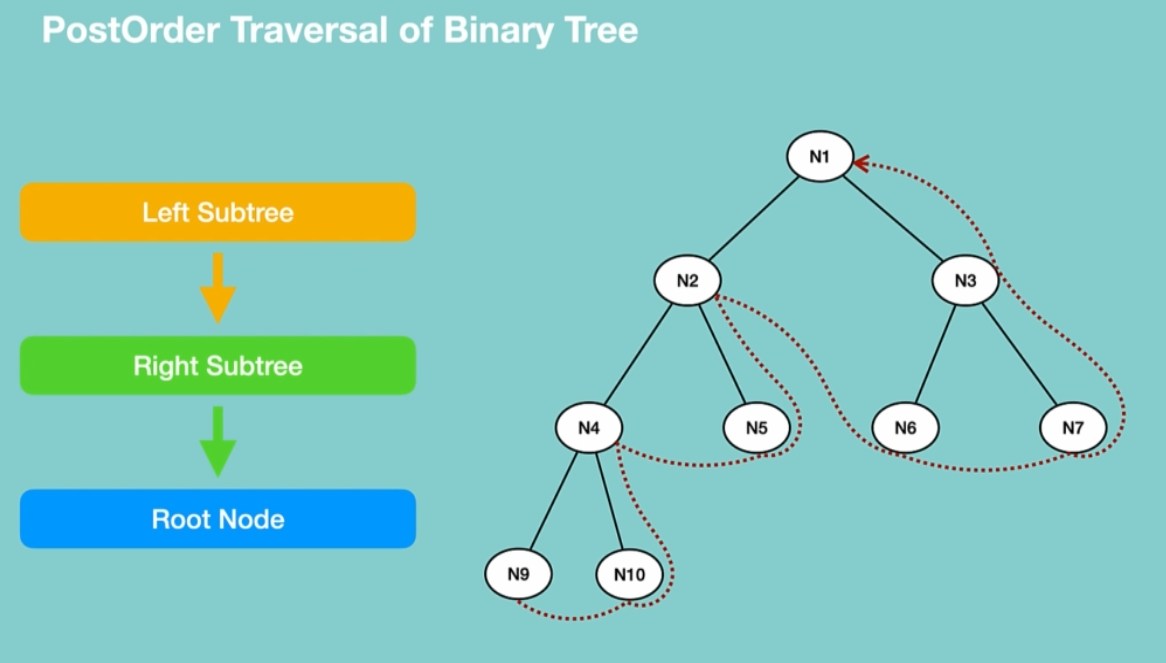

In [778]:
from IPython.display import Image
Image(filename="postorder.PNG")

In [779]:
# Time: O(n)
# Space: O(n)   Because we use stack memory
def PostOrderTraversal(rootNode):
    if rootNode == None:
        return
    PostOrderTraversal(rootNode.leftChild)
    PostOrderTraversal(rootNode.rightChild)
    print(rootNode.data)

In [780]:
PostOrderTraversal(newBT)

Caffe
Cacao
Hot
Beer
Fanta
Cold
Drinks


##### LevelOrder Traversal of Binary Tree

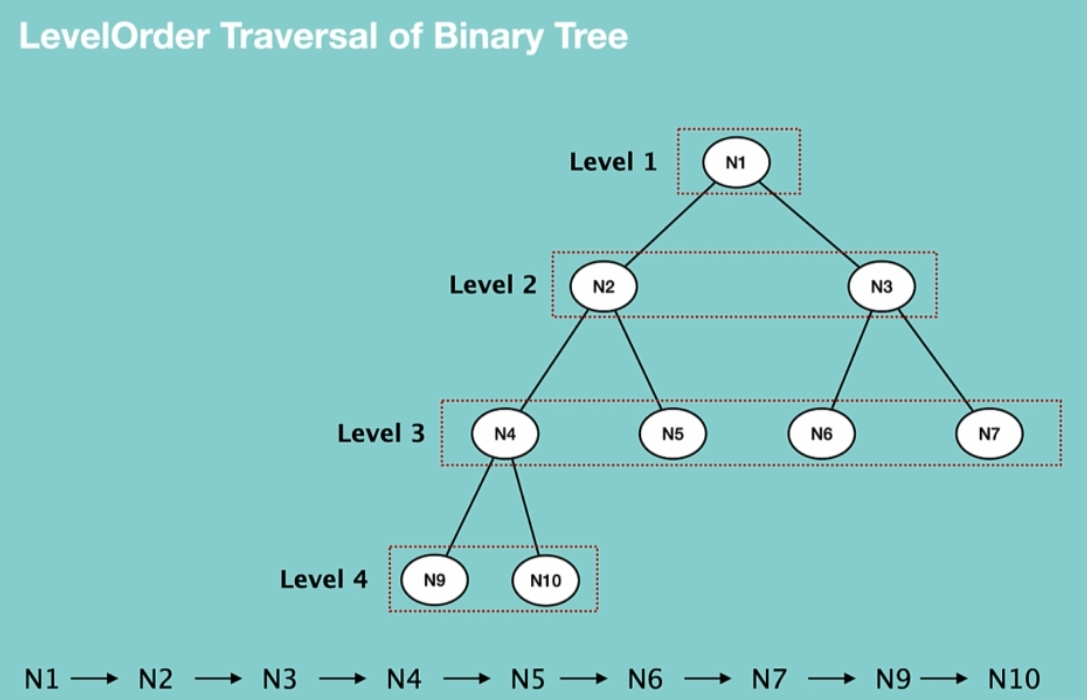

In [781]:
from IPython.display import Image
Image(filename="levelorder.PNG")

In [782]:
# In this circumstance, we use two data structure is queue and tree
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

    def __str__(self):
        return str(self.value)

class SinglyLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None

    def __iter__(self):
        curNode = self.head
        while curNode:
            yield curNode
            curNode = curNode.next

class Queue:
    def __init__(self):
        self.store = SinglyLinkedList()

    def __str__(self):
        values = [str(x.value) for x in self.store]
        return " ".join(values)

    def IsEmpty(self):
        if self.store.head == None:
            return True
        else:
            return False

    def EnQueue(self, value):
        newNode = Node(value)
        if self.store.head == None:
            self.store.head = newNode
            self.store.tail = newNode
        else:
            self.store.tail.next = newNode
            self.store.tail = newNode

    def DeQueue(self):
        if self.IsEmpty():
            return "The Queue is empty."
        else:
            tempNode = self.store.head
            if self.store.head == self.store.tail:
                self.store.head = None
                self.store.tail = None
            else:
                self.store.head = self.store.head.next
            return tempNode

    def Peak(self):
        if self.IsEmpty():
            return "The Queue is empty."
        else:
            return self.store.head.value

    def Delete(self):
        self.store.head = None
        self.store.tail = None

In [783]:
# Time: O(n)
# Space: O(n)   Because we use stack memory
# Idea: We save data in node to Queue in then print their
def LevelOrderTraversal(rootNode):
    if rootNode == None:
        return
    else:
        customQueue = Queue()
        customQueue.EnQueue(rootNode)
        while not(customQueue.IsEmpty()):
            root = customQueue.DeQueue()
            print(root.value.data)
            if root.value.leftChild != None:
                customQueue.EnQueue(root.value.leftChild)
            if root.value.rightChild != None:
                customQueue.EnQueue(root.value.rightChild)

In [784]:
LevelOrderTraversal(newBT)

Drinks
Hot
Cold
Caffe
Cacao
Beer
Fanta


### Searching for a Node in Binary Tree

In [785]:
# Use LevelTraversal
# Time: O(n)
# Space: O(n)   Because we use stack memory
# Idea: We save data in node to Queue
def SearchingBT(rootNode, key_data):
    if rootNode == None:
        return "Value {} not exist in Tree".format(key_data)
    else:
        customQueue = Queue()
        customQueue.EnQueue(rootNode)
        while not(customQueue.IsEmpty()):
            root = customQueue.DeQueue()
            if root.value.data == key_data:
                return "Value {} in Tree".format(key_data)
            if root.value.leftChild != None:
                customQueue.EnQueue(root.value.leftChild)
            if root.value.rightChild != None:
                customQueue.EnQueue(root.value.rightChild)
    return "Value {} not exist in Tree".format(key_data)
SearchingBT(newBT, "34")

'Value 34 not exist in Tree'

### Insert for a Node in Binary Tree

In [786]:
# Time: O(n)
# Space: O(n)
def InsertBT(rootNode, newNode):
    if rootNode == None:
        rootNode = newNode
    else:
        customQueue = Queue()
        customQueue.EnQueue(rootNode)
        while not customQueue.IsEmpty():
            node = customQueue.DeQueue()
            if node.value.leftChild != None:
                customQueue.EnQueue(node.value.leftChild)
            else:
                node.value.leftChild = newNode
                return "successfully Inserted"
            if node.value.rightChild != None:
                customQueue.EnQueue(node.value.rightChild)
            else:
                node.value.rightChild = newNode
                return "successfully Inserted"
one_node = TreeNode("insert")
InsertBT(newBT, one_node)
PreOrderTraversal(newBT)
InOrderTraversal(newBT)

Drinks
Hot
Caffe
insert
Cacao
Cold
Beer
Fanta
insert
Caffe
Hot
Cacao
Drinks
Beer
Cold
Fanta


### Delete from a Node in Binary Tree

In [787]:
def GetDeepestNode(rootNode):
    if rootNode == None:
        return 
    else:
        customQueue = Queue()
        customQueue.EnQueue(rootNode)
        while not customQueue.IsEmpty():
            node = customQueue.DeQueue()
            if node.value.leftChild != None:
                customQueue.EnQueue(node.value.leftChild)
            if node.value.rightChild != None:
                customQueue.EnQueue(node.value.rightChild)
    deepestNode = node.value
    return deepestNode



def DeleteDeepestNode(rootNode, deepestNode):
    if rootNode == None:
        return 
    else:
        customQueue = Queue()
        customQueue.EnQueue(rootNode)
        while not customQueue.IsEmpty():
            node = customQueue.DeQueue()
            if node is deepestNode:
                node = None
                return "Delete successfully"
            if node.value.leftChild != None:
                if node.value.leftChild is deepestNode:
                    node.value.leftChild = None
                    return "Delete successfully"
                customQueue.EnQueue(node.value.leftChild)
            if node.value.rightChild != None:
                if node.value.rightChild is deepestNode:
                    node.value.rightChild = None
                    return "Delete successfully"
                customQueue.EnQueue(node.value.rightChild)


def DeleteNodeBT(rootNode, data):
    if rootNode == None:
        return 
    else:
        deepestNode = GetDeepestNode(rootNode)
        customQueue = Queue()
        customQueue.EnQueue(rootNode)
        while not customQueue.IsEmpty():
            node = customQueue.DeQueue()
            if node.value.data == data:
                node.value.data = deepestNode.data
                DeleteDeepestNode(rootNode, deepestNode)
                return "Delete successfully"
            if node.value.leftChild != None:
                customQueue.EnQueue(node.value.leftChild)
            if node.value.rightChild != None:
                customQueue.EnQueue(node.value.rightChild)
    return "Can't delete node from Tree"


In [788]:
LevelOrderTraversal(newBT)

Drinks
Hot
Cold
Caffe
Cacao
Beer
Fanta
insert


In [789]:
DeleteNodeBT(newBT, "insert")

'Delete successfully'

In [790]:
LevelOrderTraversal(newBT)

Drinks
Hot
Cold
Caffe
Cacao
Beer
Fanta


### Delete Entire Binary Tree

In [791]:
def DeleteEntireBT(rootNode):
    rootNode.leftChild = None
    rootNode.rightChild = None
    rootNode.data = None
    return "Binary Tree Has Been Deleted Entirely"

In [792]:
DeleteEntireBT(newBT)

'Binary Tree Has Been Deleted Entirely'

In [793]:
print(newBT.data)

None


In [794]:
LevelOrderTraversal(newBT)

None


## Tree using Python List

### Create Binary Tree Using Python List

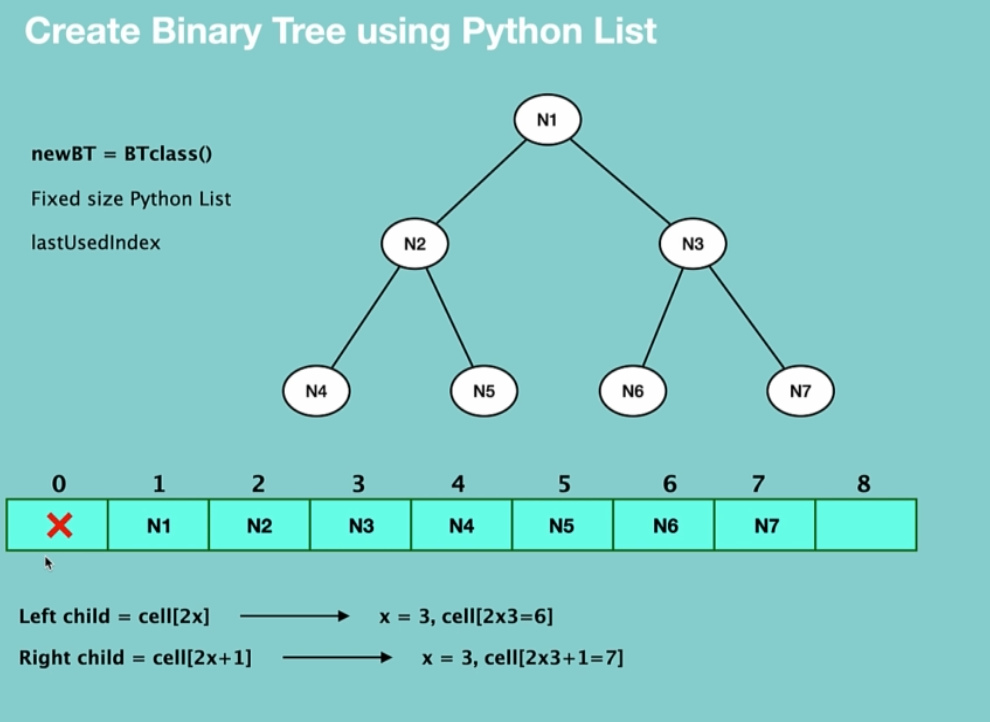

In [795]:
from IPython.display import Image
Image(filename="create_l.PNG")

In [796]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

In [797]:
newBT = BinaryTree(8)

### Insert a node in Binary Tree Using Python List

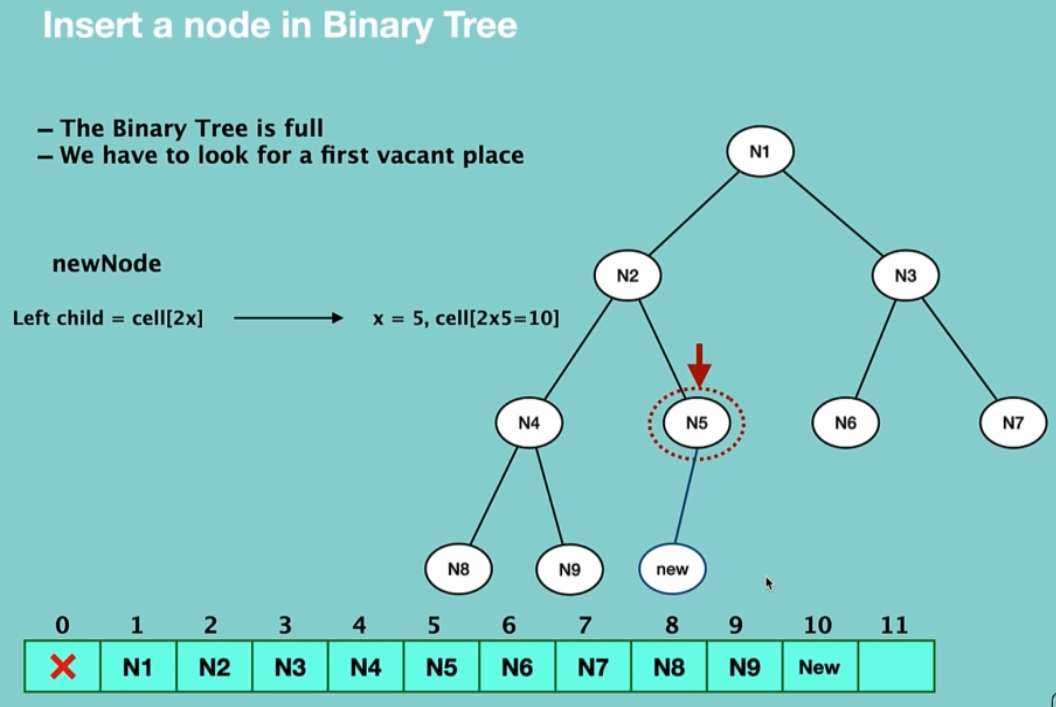

In [798]:
from IPython.display import Image
Image(filename="insert_l.PNG")

In [799]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"

In [800]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")

'The value has been successfully inserted'

In [801]:
print(newBT.customList)

[None, 'Drinks', 'Hot', 'Cold', None, None, None, None]


### Searching for a node in Binary Tree Using Python List

In [802]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

##### PreOrder Traversal of Binary Tree Python List

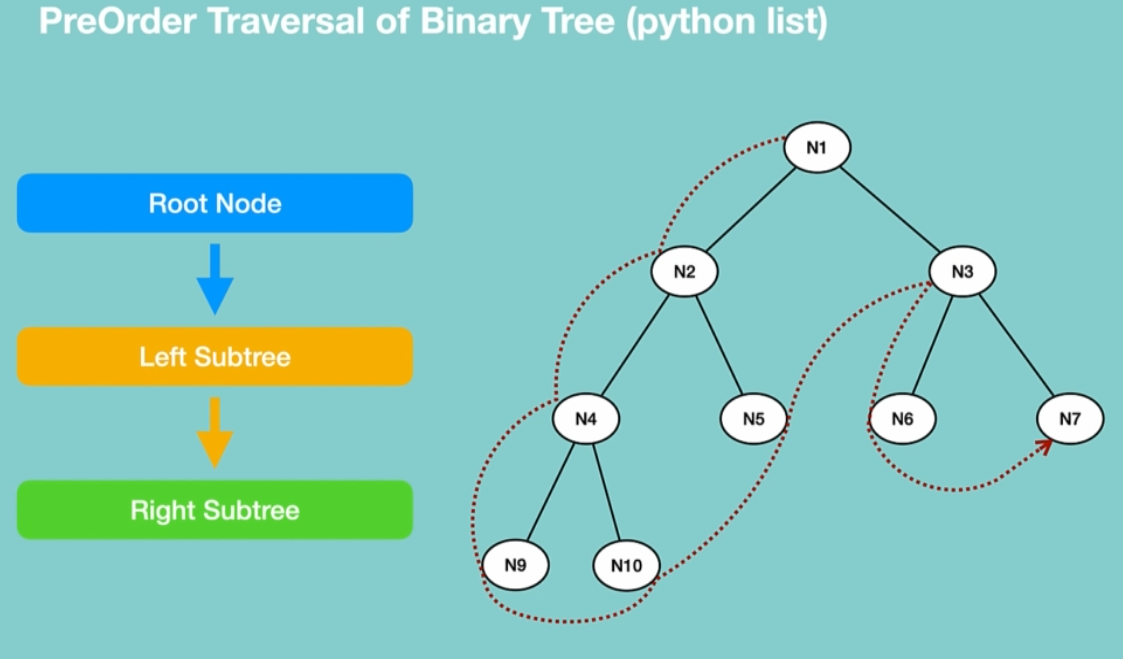

In [803]:
from IPython.display import Image
Image(filename="preorder_l.PNG")

In [804]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

    
    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PreOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        print(self.customList[index])
        self.PreOrderTraversal(index*2)
        self.PreOrderTraversal(index*2+1)



In [805]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")
newBT.PreOrderTraversal(1)

Drinks
Hot
Cold


##### InOrder Traversal of Binary Tree Python List

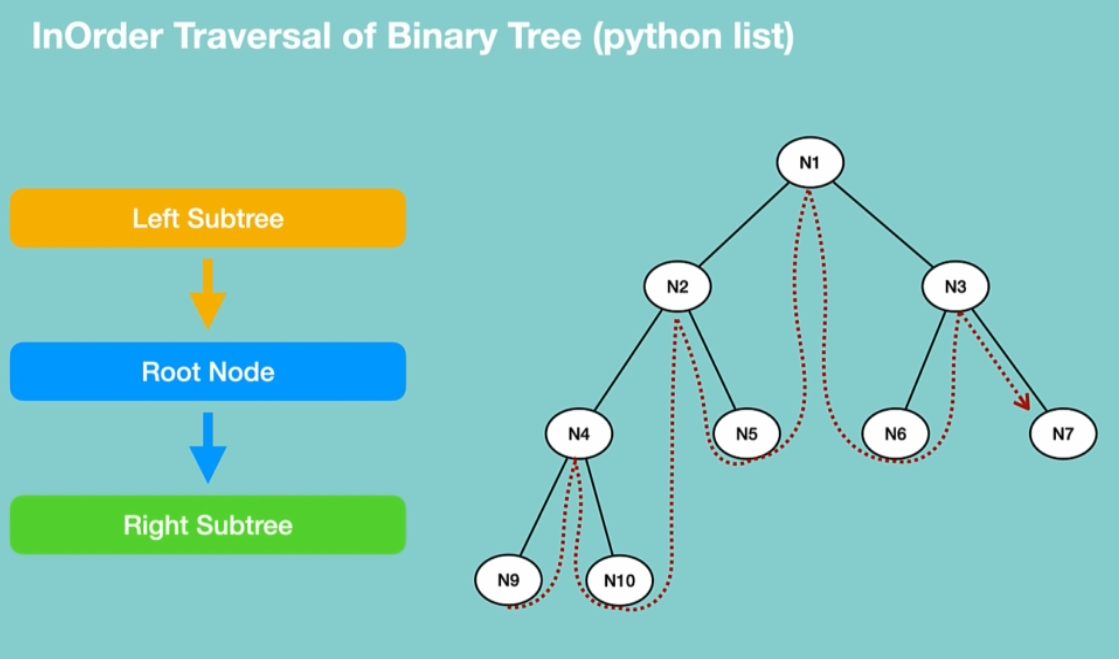

In [806]:
from IPython.display import Image
Image(filename="inorder_l.PNG")

In [807]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

    
    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PreOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        print(self.customList[index])
        self.PreOrderTraversal(index*2)
        self.PreOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def InOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.InOrderTraversal(index*2)
        print(self.customList[index])
        self.InOrderTraversal(index*2+1)

In [808]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")
newBT.InOrderTraversal(1)

Hot
Drinks
Cold


##### PostOrder Traversal of Binary Tree Python List

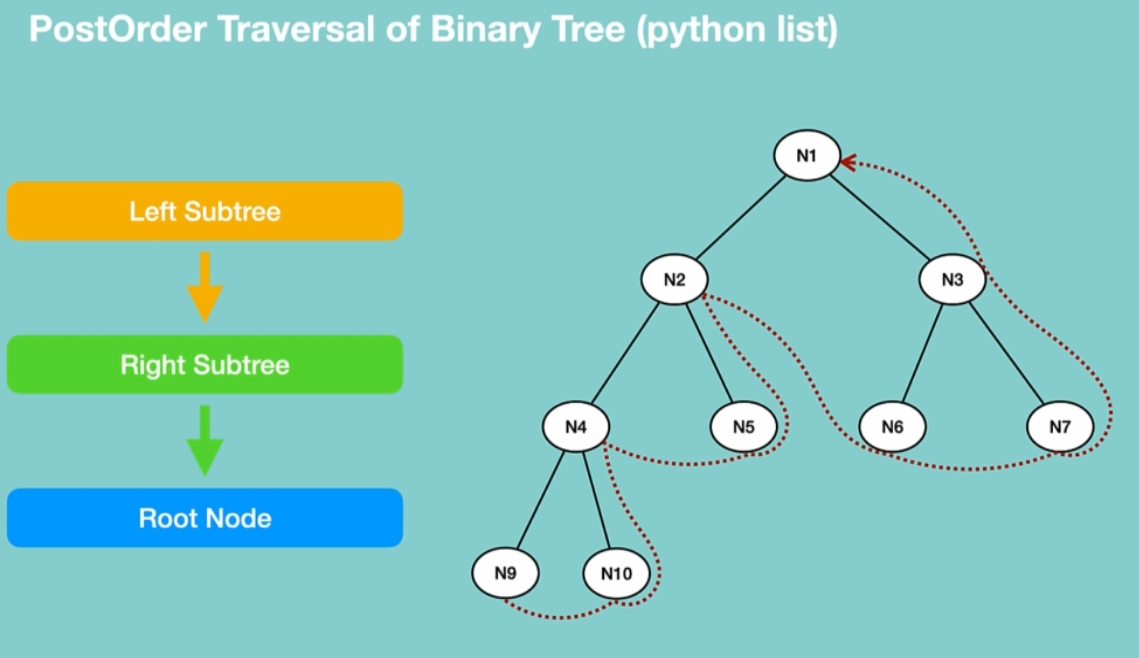

In [809]:
from IPython.display import Image
Image(filename="postorder_l.PNG")

In [810]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

    
    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PreOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        print(self.customList[index])
        self.PreOrderTraversal(index*2)
        self.PreOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def InOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.InOrderTraversal(index*2)
        print(self.customList[index])
        self.InOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PostOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.PostOrderTraversal(index*2)
        self.PostOrderTraversal(index*2+1)
        print(self.customList[index])


In [811]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")
newBT.PostOrderTraversal(1)

Hot
Cold
Drinks


##### LevelOrder Traversal of Binary Tree Python List

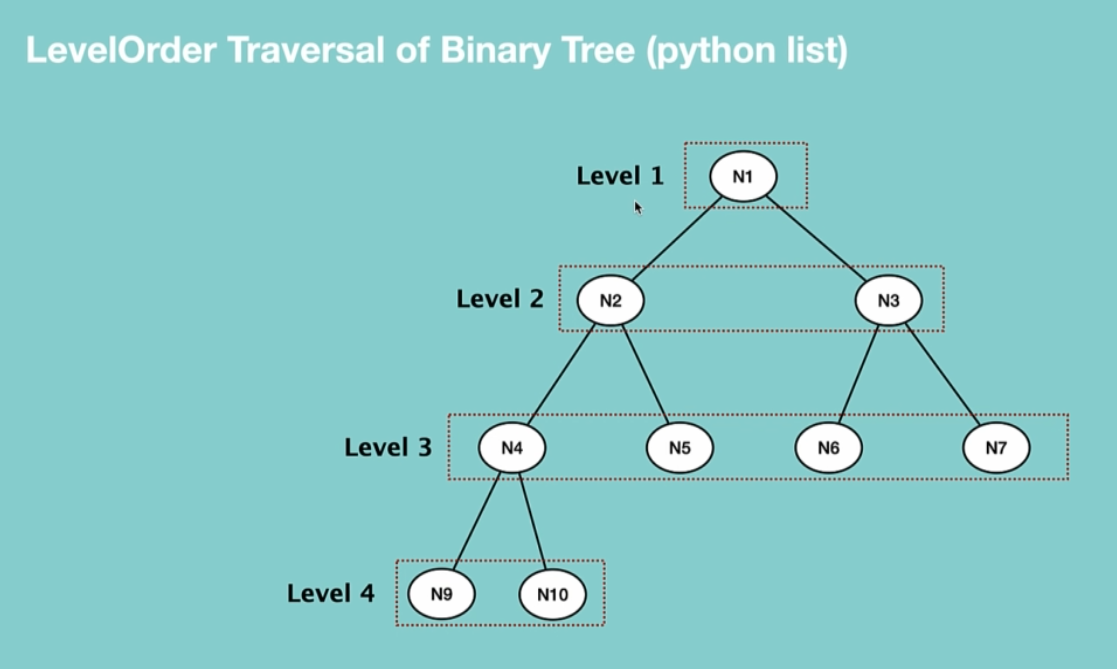

In [812]:
from IPython.display import Image
Image(filename="levelorder_l.PNG")

In [813]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

    
    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PreOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        print(self.customList[index])
        self.PreOrderTraversal(index*2)
        self.PreOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def InOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.InOrderTraversal(index*2)
        print(self.customList[index])
        self.InOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PostOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.PostOrderTraversal(index*2)
        self.PostOrderTraversal(index*2+1)
        print(self.customList[index])


    # Time: O(n)
    # Space: O(1)
    def LevelOrderTraversal(self, index):
        if self.lastUsedIndex <= 0:
             return
        for i in range(index,self.lastUsedIndex+1):
            print(self.customList[i])


In [814]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")
newBT.LevelOrderTraversal(1)

Drinks
Hot
Cold


### Delete a node from Binary Tree Using Python List

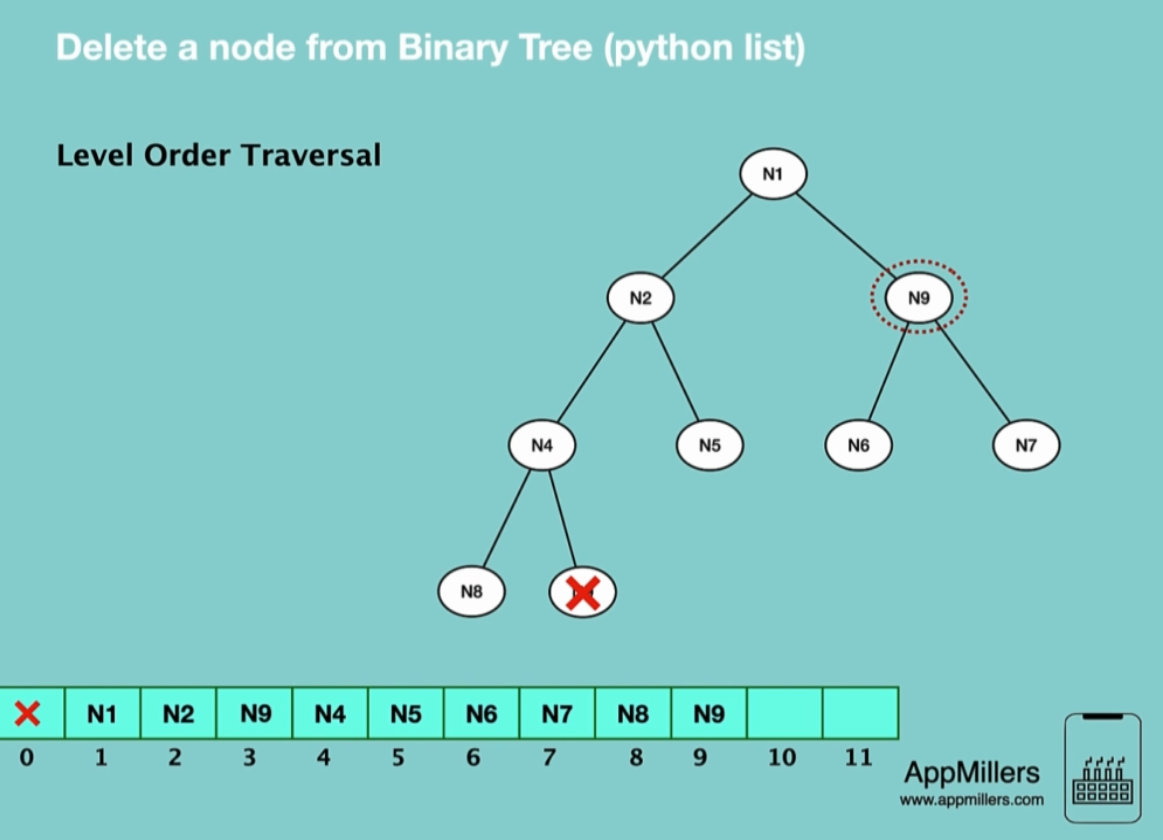

In [815]:
from IPython.display import Image
Image(filename="deletenode_l.PNG")

In [816]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

    
    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PreOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        print(self.customList[index])
        self.PreOrderTraversal(index*2)
        self.PreOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def InOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.InOrderTraversal(index*2)
        print(self.customList[index])
        self.InOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PostOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.PostOrderTraversal(index*2)
        self.PostOrderTraversal(index*2+1)
        print(self.customList[index])


    # Time: O(n)
    # Space: O(1)
    def LevelOrderTraversal(self, index):
        if self.lastUsedIndex <= 0:
             return
        for i in range(index,self.lastUsedIndex+1):
            print(self.customList[i])


    # Time: O(n)
    # Space: O(1)
    def DeleteNode(self, value):
        if self.lastUsedIndex == 0:
            return
        for i in range(1, self.lastUsedIndex+1):
            if self.customList[i] == value:
                self.customList[i] = self.customList[self.lastUsedIndex]
                self.customList[self.lastUsedIndex] = None
                self.lastUsedIndex -= 1
                return "Delete Successfully"
        return "Can not delete node"

In [817]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")
newBT.InsertNode("Tea")
newBT.InsertNode("Coffe")
newBT.DeleteNode("Coffe")

'Delete Successfully'

In [818]:
newBT.LevelOrderTraversal(1)

Drinks
Hot
Cold
Tea


### Delete Entire Binary Tree Using Python List

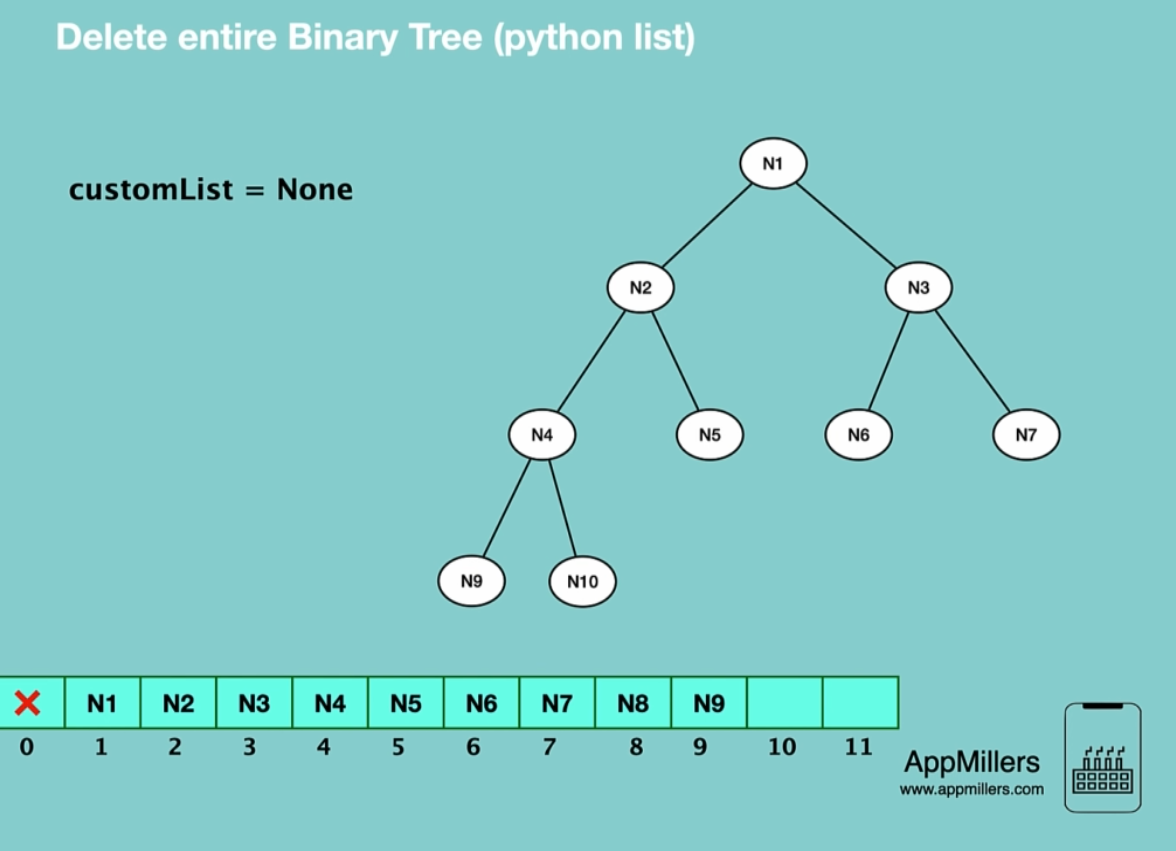

In [819]:
from IPython.display import Image
Image(filename="deleteentire_l.PNG")

In [820]:
class BinaryTree:
    # Time: O(1)
    # Space: O(n)
    def __init__(self, size):
        self.customList = size * [None]
        self.lastUsedIndex = 0
        self.maxSize = size

    # Time: O(1)
    # Space: O(1)
    def InsertNode(self, value):
        if self.lastUsedIndex + 1 == self.maxSize:
            return "The Binary Tree is full"
        self.customList[self.lastUsedIndex+1] = value
        self.lastUsedIndex += 1
        return "The value has been successfully inserted"


    # Time: O(n)
    # Space: O(1)
    def SearchNode(self, nodeValue):
        for i in range(len(self.customList)):
            if self.customList[i] == nodeValue:
                return "Success"
        return "Not Found"

    
    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PreOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        print(self.customList[index])
        self.PreOrderTraversal(index*2)
        self.PreOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def InOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.InOrderTraversal(index*2)
        print(self.customList[index])
        self.InOrderTraversal(index*2+1)


    # Time: O(n)
    # Space: O(n)           Because we use stack memory
    def PostOrderTraversal(self, index):
        if index > self.lastUsedIndex:
            return
        self.PostOrderTraversal(index*2)
        self.PostOrderTraversal(index*2+1)
        print(self.customList[index])


    # Time: O(n)
    # Space: O(1)
    def LevelOrderTraversal(self, index):
        if self.lastUsedIndex <= 0:
             return
        for i in range(index,self.lastUsedIndex+1):
            print(self.customList[i])


    # Time: O(n)
    # Space: O(1)
    def DeleteNode(self, value):
        if self.lastUsedIndex == 0:
            return
        for i in range(1, self.lastUsedIndex+1):
            if self.customList[i] == value:
                self.customList[i] = self.customList[self.lastUsedIndex]
                self.customList[self.lastUsedIndex] = None
                self.lastUsedIndex -= 1
                return "Delete Successfully"
        return "Can not delete node"

    # Time: O(1)
    # Space: O(1)
    def DeleteEntire(self):
        self.customList = None
        self.lastUsedIndex = 0
        return "Delete Entire Binary Tree"

In [821]:
newBT = BinaryTree(8)
newBT.InsertNode("Drinks")
newBT.InsertNode("Hot")
newBT.InsertNode("Cold")
newBT.InsertNode("Tea")
newBT.InsertNode("Coffe")
newBT.DeleteEntire()

'Delete Entire Binary Tree'

In [822]:
newBT.LevelOrderTraversal(1)

### Binary Tree (Python List vs Linked List)

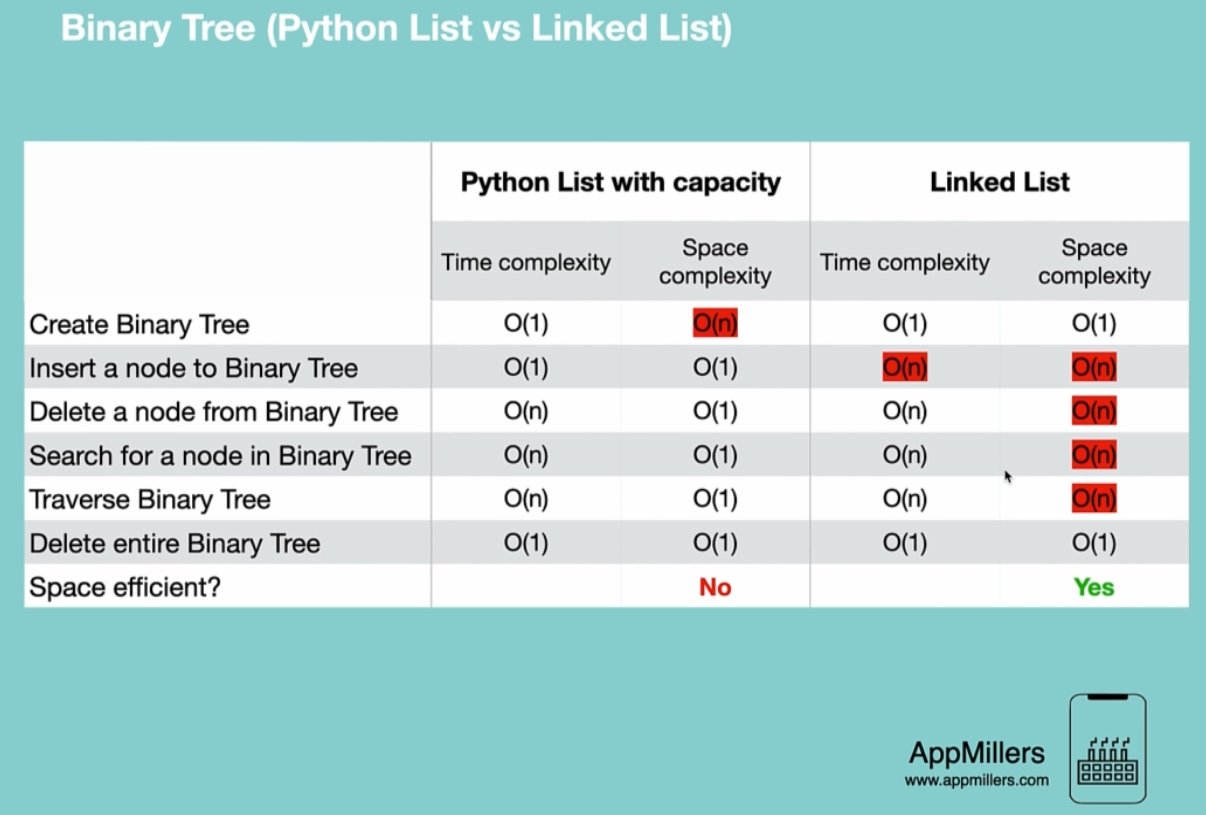

In [823]:
from IPython.display import Image
Image(filename="compare.PNG")